In [1]:
from IFD_tsne import *
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
from utils import MidpointNormalize, load_data
import seaborn as sns
import matplotlib.pyplot as plt
from tueplots.constants.color import palettes
cmap = mpl.colors.LinearSegmentedColormap.from_list("", [palettes.tue_plot[0], "white", palettes.tue_plot[3]])
from jax import vjp, linearize, grad

In [2]:
#X, y = make_blobs(n_samples=50, n_features=50, centers=4, random_state=0, shuffle=False, cluster_std=[0.1, 3, 3, 3])
X, y = load_data(50)
#X, y = make_blobs(n_samples=50, n_features=10, centers=1, random_state=0, shuffle=False)
key = random.PRNGKey(42)

#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(X.shape[0], 2))
#Y_star = TSNE(n_components=2, learning_rate=200, init=onp.array(y_guess), perplexity=30).fit_transform(X)
Y_star = tsne_fwd(X, y_guess)
X_flat, X_unflattener = flatten_util.ravel_pytree(X)   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


===> Finding 49 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 0.9550, 50 iterations in 0.6769 sec
Iteration  100, KL divergence 0.9735, 50 iterations in 0.6753 sec
Iteration  150, KL divergence 0.8691, 50 iterations in 0.6741 sec
Iteration  200, KL divergence 0.9032, 50 iterations in 0.6550 sec
Iteration  250, KL divergence 0.9968, 50 iterations in 0.6544 sec
   --> Time elapsed: 3.34 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.1179, 50 iterations in 0.6541 sec
Iteration  100, KL divergence 0.1179, 50 iterations in 0.6642 sec
Iteration  150, KL divergence 0.1179, 50 iterations in 0.6680 sec
Iteration  200, KL divergence 0.1179, 50 iterations in 0.6595 sec
Iteration 

In [4]:
N, D = X_unflattener(X_flat).shape
A = np.diag(np.ones(N))
B = np.diag(np.ones(D))

In [ ]:
cov = error_propagation_tsne(X_flat, X_unflattener, Y_flat, Y_unflattener, A, B, neumann_iterations=200)

<AxesSubplot: >

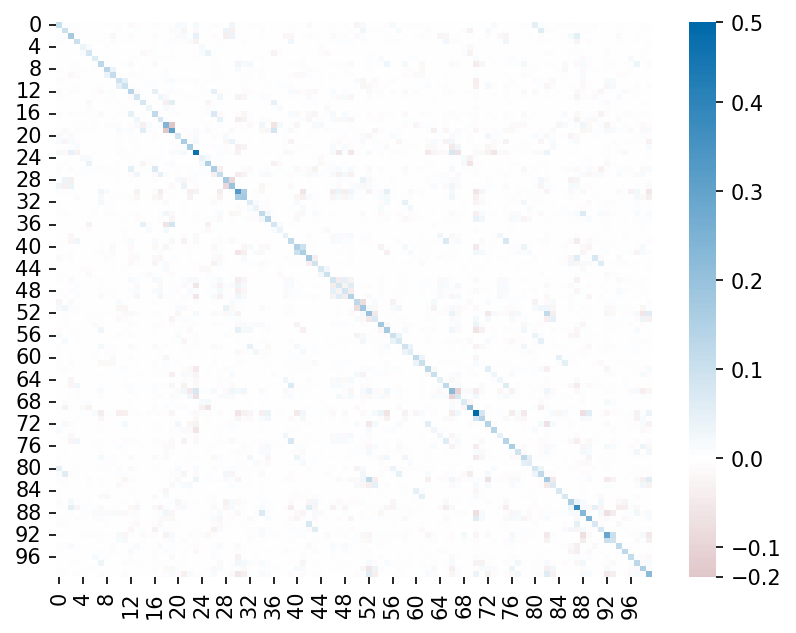

In [4]:
sns.heatmap(cov, cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(cov), vmax=np.max(cov))))

In [7]:
dy, H, J = d_y_star_d_x_outer(regularized_KL_divergence, X, Y_star)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function


<AxesSubplot: >

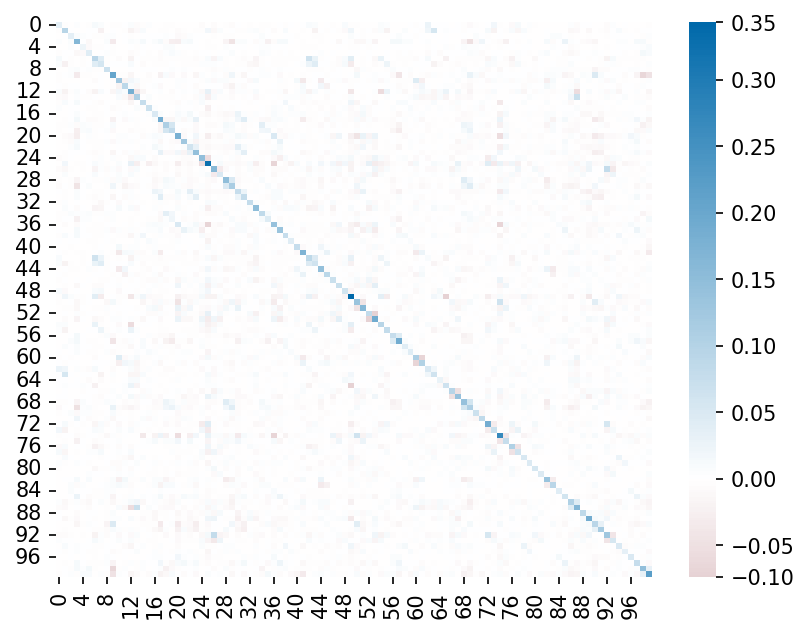

In [8]:
sns.heatmap(cov, cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(cov), vmax=np.max(cov))))

In [6]:
reg_factors = [0.01, 0.001, 0.0001]
H_invs = []
for reg in reg_factors:
    H_inv = get_exact_inverse(X, Y_star, reg)
    H_invs.append(H_inv)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function


<AxesSubplot: >

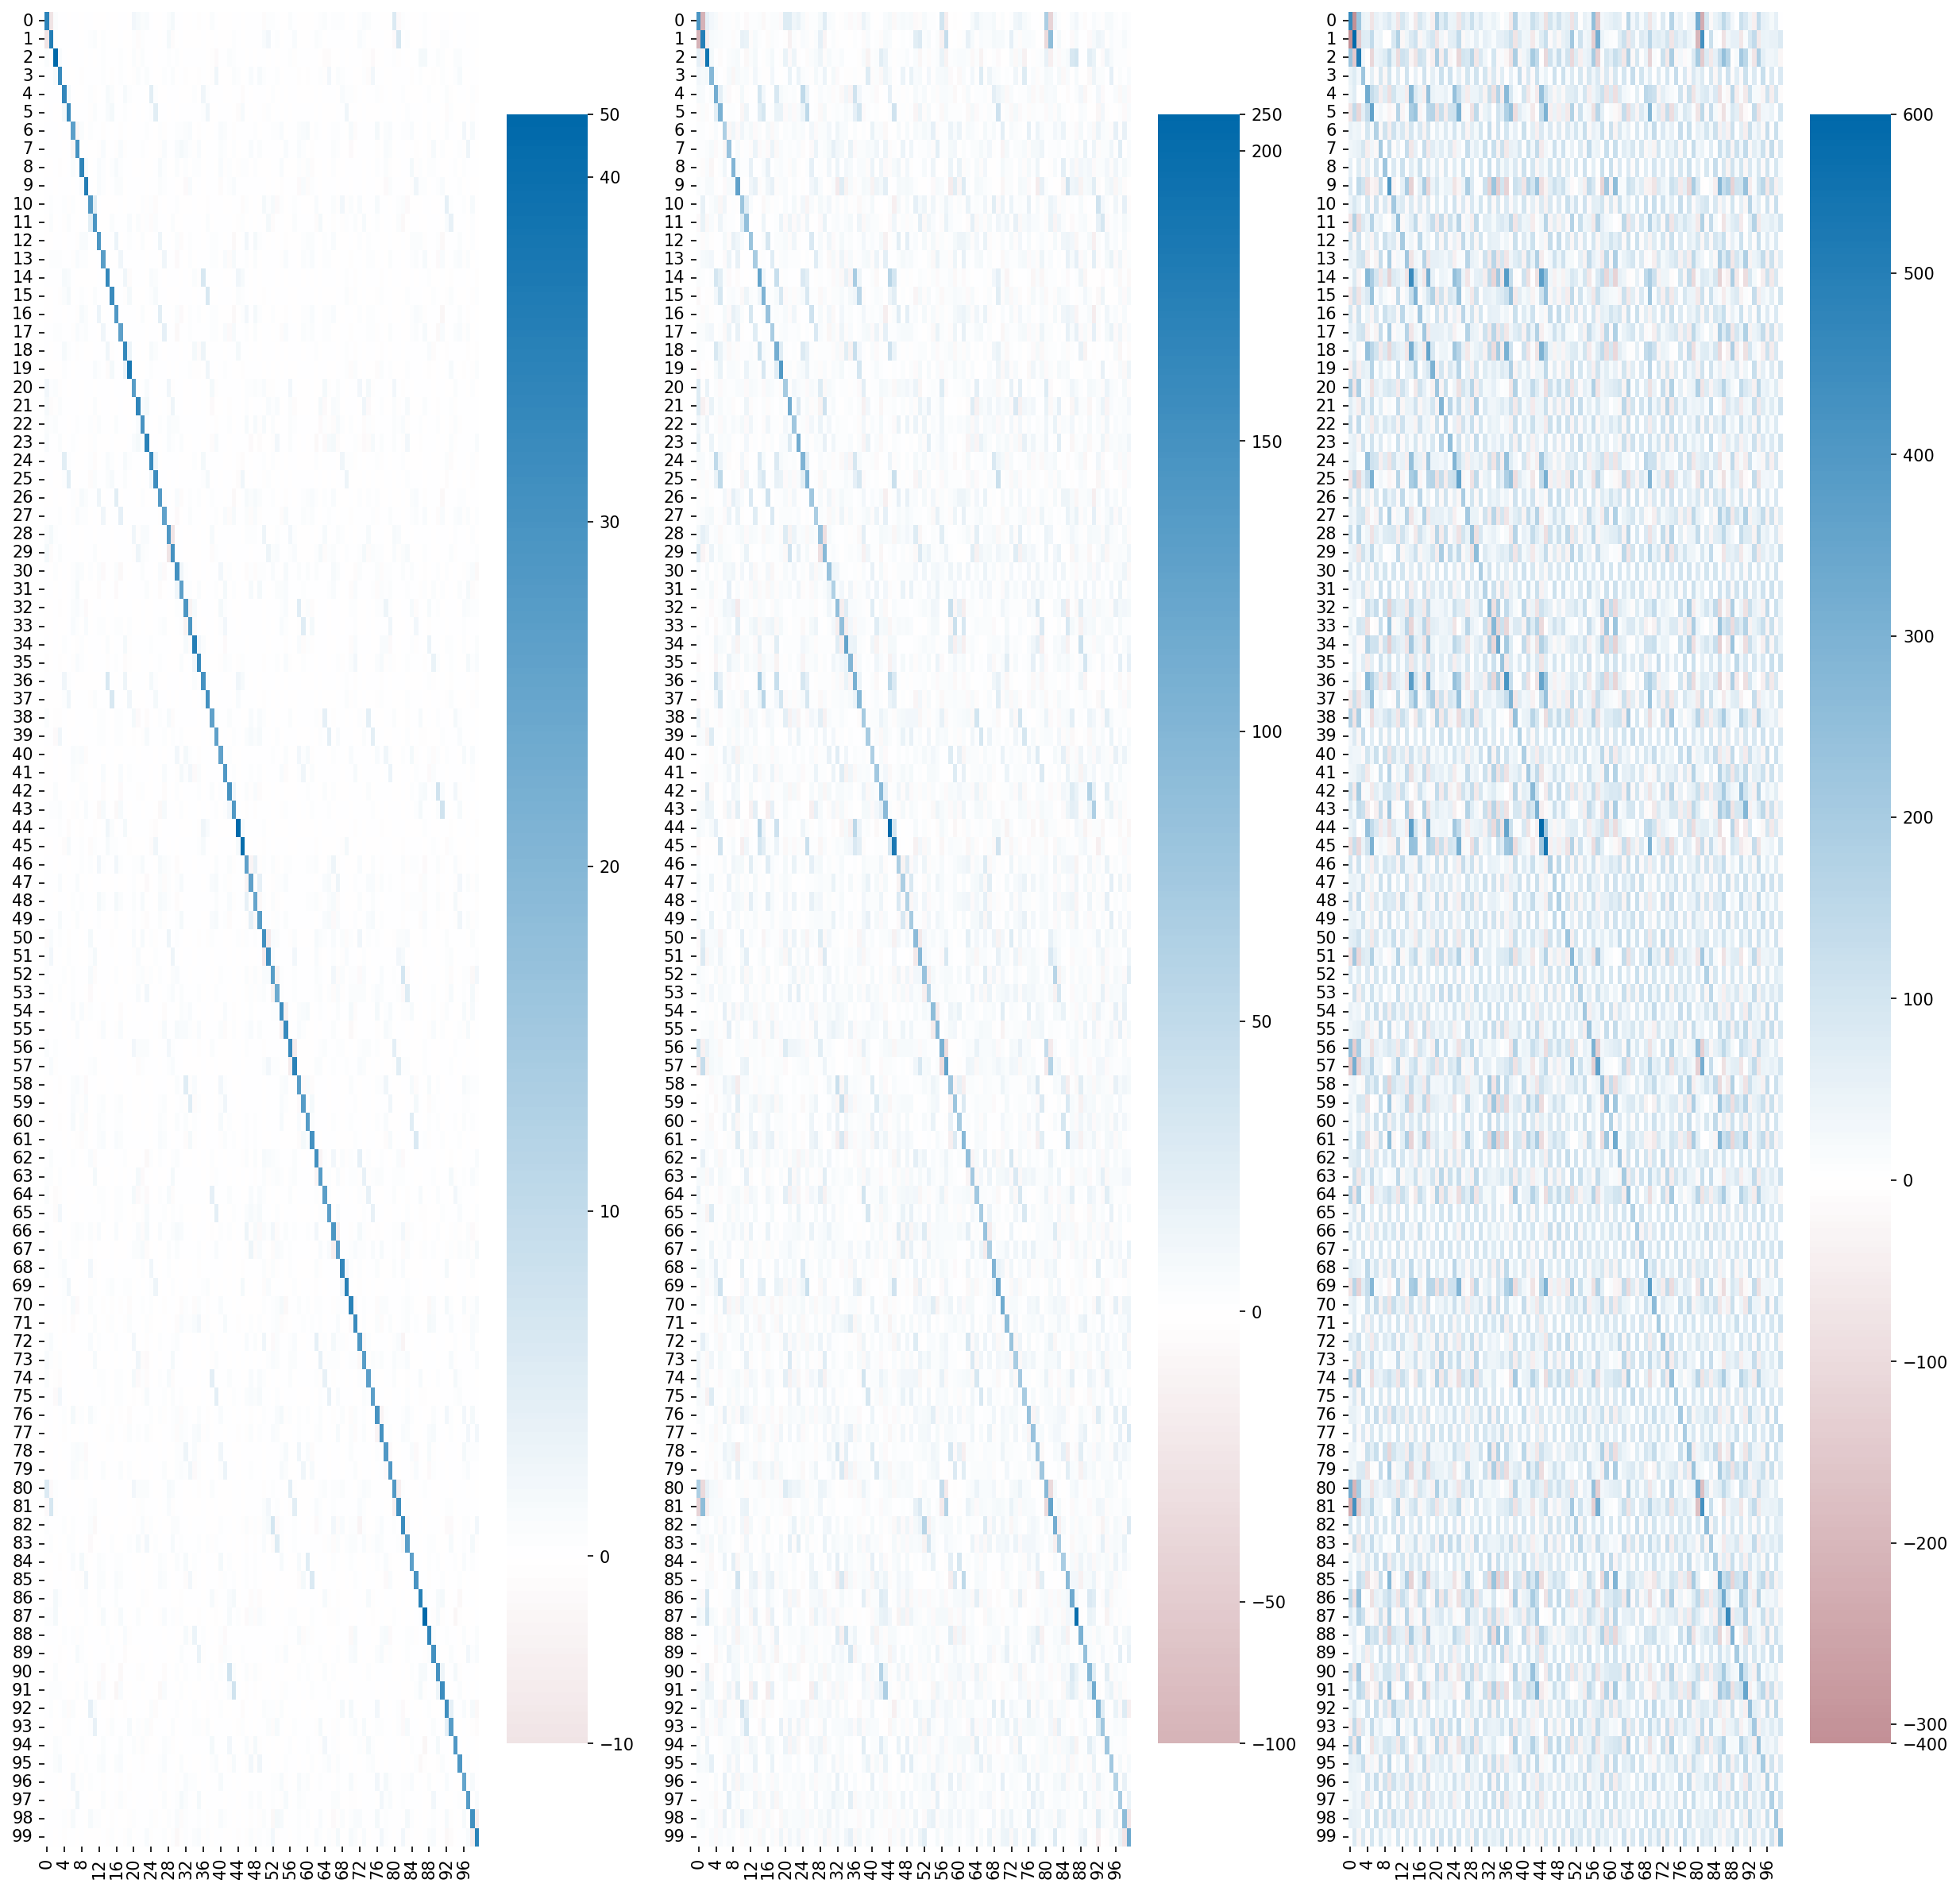

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
sns.heatmap(H_invs[0], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(H_invs[0]), vmax=np.max(H_invs[0]))), ax=ax1)
sns.heatmap(H_invs[1], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(H_invs[1]), vmax=np.max(H_invs[1]))), ax=ax2)
sns.heatmap(H_invs[2], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(H_invs[2]), vmax=np.max(H_invs[2]))), ax=ax3)

In [ ]:
reg_factors = [0.01, 0.001, 0.0001]

In [8]:
H_invs = []
for reg in reg_factors:
    H_inv = get_Neumann_approximation(X_flat, X_unflattener, 
                                         Y_flat, Y_unflattener, 
                                         reg_factor = reg, 
                                         neumann_iterations=800)
    H_invs.append(H_inv)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function


<AxesSubplot: >

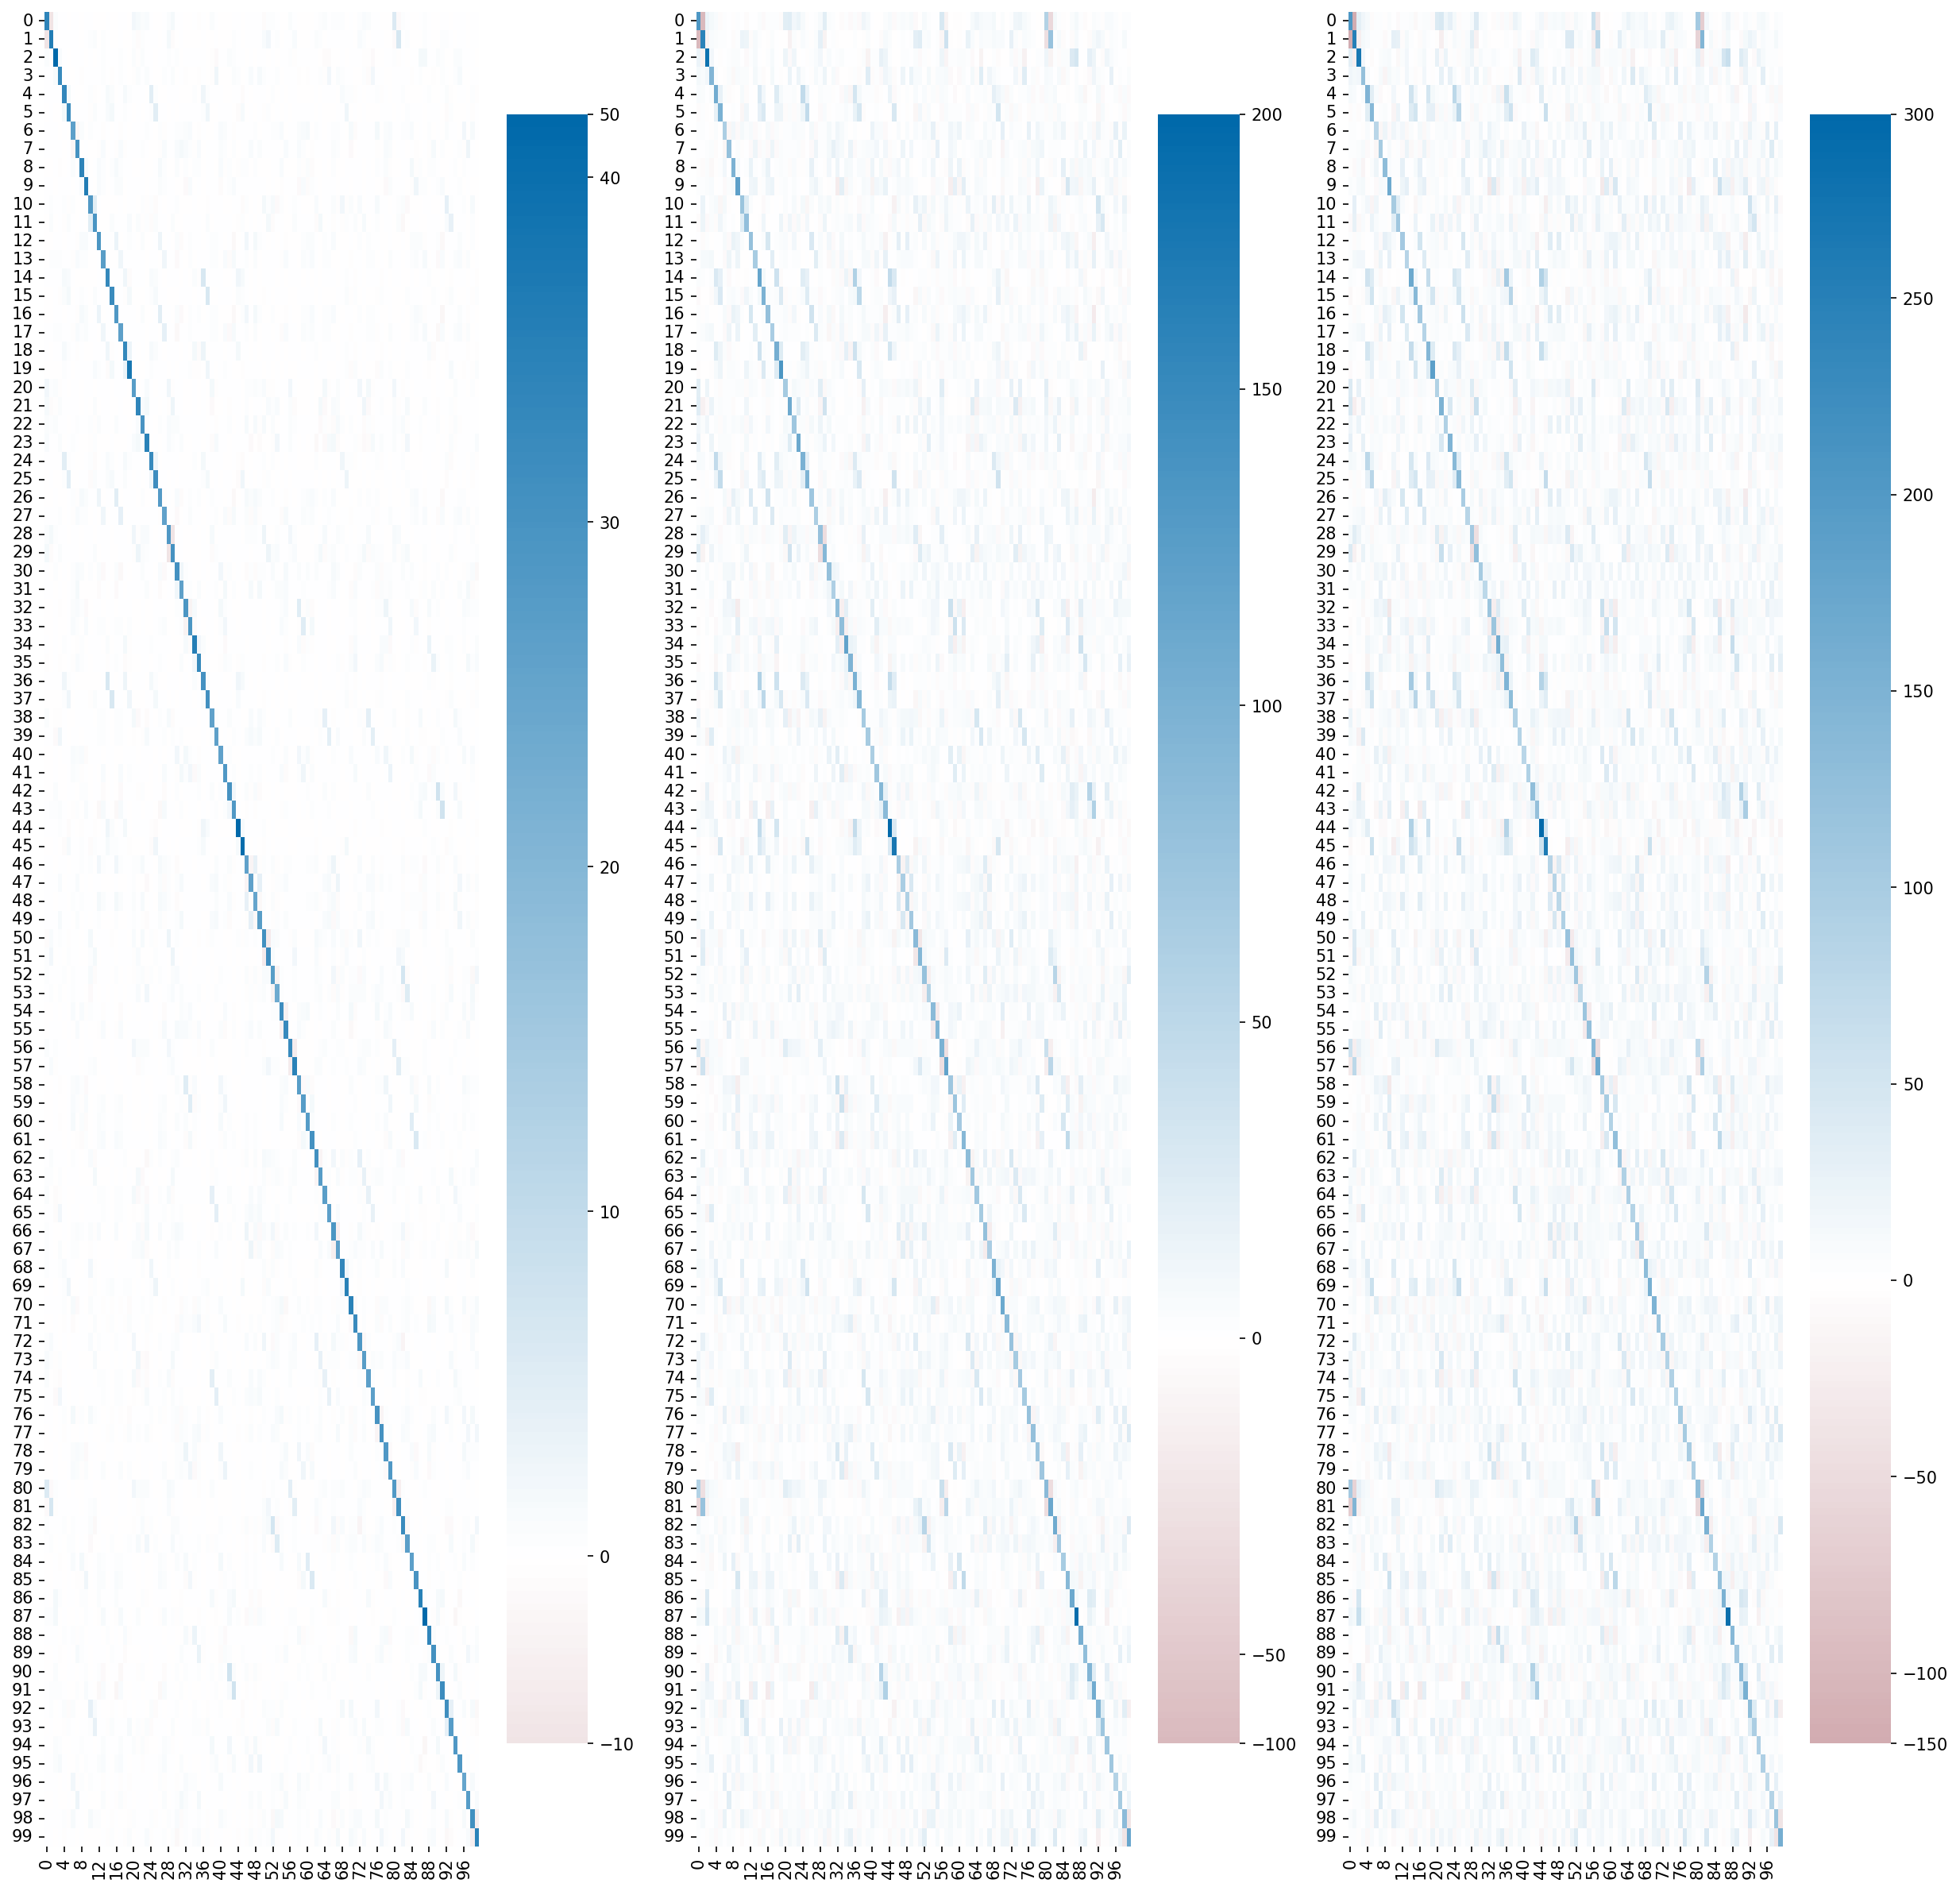

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
sns.heatmap(H_invs[0], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(H_invs[0]), vmax=np.max(H_invs[0]))), ax=ax1)
sns.heatmap(H_invs[1], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(H_invs[1]), vmax=np.max(H_invs[1]))), ax=ax2)
sns.heatmap(H_invs[2], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(H_invs[2]), vmax=np.max(H_invs[2]))), ax=ax3)

In [6]:
reg_factors = [0.01, 0.001, 0.0001]
covs = []
for reg in reg_factors:
    cov = error_propagation_tsne(X_flat, X_unflattener, Y_flat, Y_unflattener, A, B, reg, neumann_iterations=800)
    covs.append(cov)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
(100,)
(100,)
(2500,)
(2500,)
Traced<ShapedArray(float32[100])>with<BatchTrace(level=1/0)> with
  val = Array([[ 9.2743873e-04, -1.6529611e-04, -1.4724808e-04, ...,
        -1.7784412e-05,  1.2296595e-04,  3.4750610e-05],
       [-1.4889720e-04,  5.2044872e-04,  1.0208030e-05, ...,
         5.0217232e-06, -2.9620802e-05,  9.0033594e-05],
       [-1.3227784e-04,  2.8820646e-06,  1.6413052e-03, ...,
        -1.4719892e-05, -1.6604297e-04,  1.9441704e-06],
       ...,
       [-1.6718572e-05,  3.6176516e-06, -1.0777034e-05, ...,
         6.3502899e-04, -7.8515541e-06, -8.2313909e-07],
       [ 1.4834647e-04, -4.3006614e-05, -1.7583881e-04, ...,
        -1.3334209e-05,  7.7002577e-04, -8.4819076e-05],
       [ 1.6998663e-05,  8.2916747e-

<AxesSubplot: >

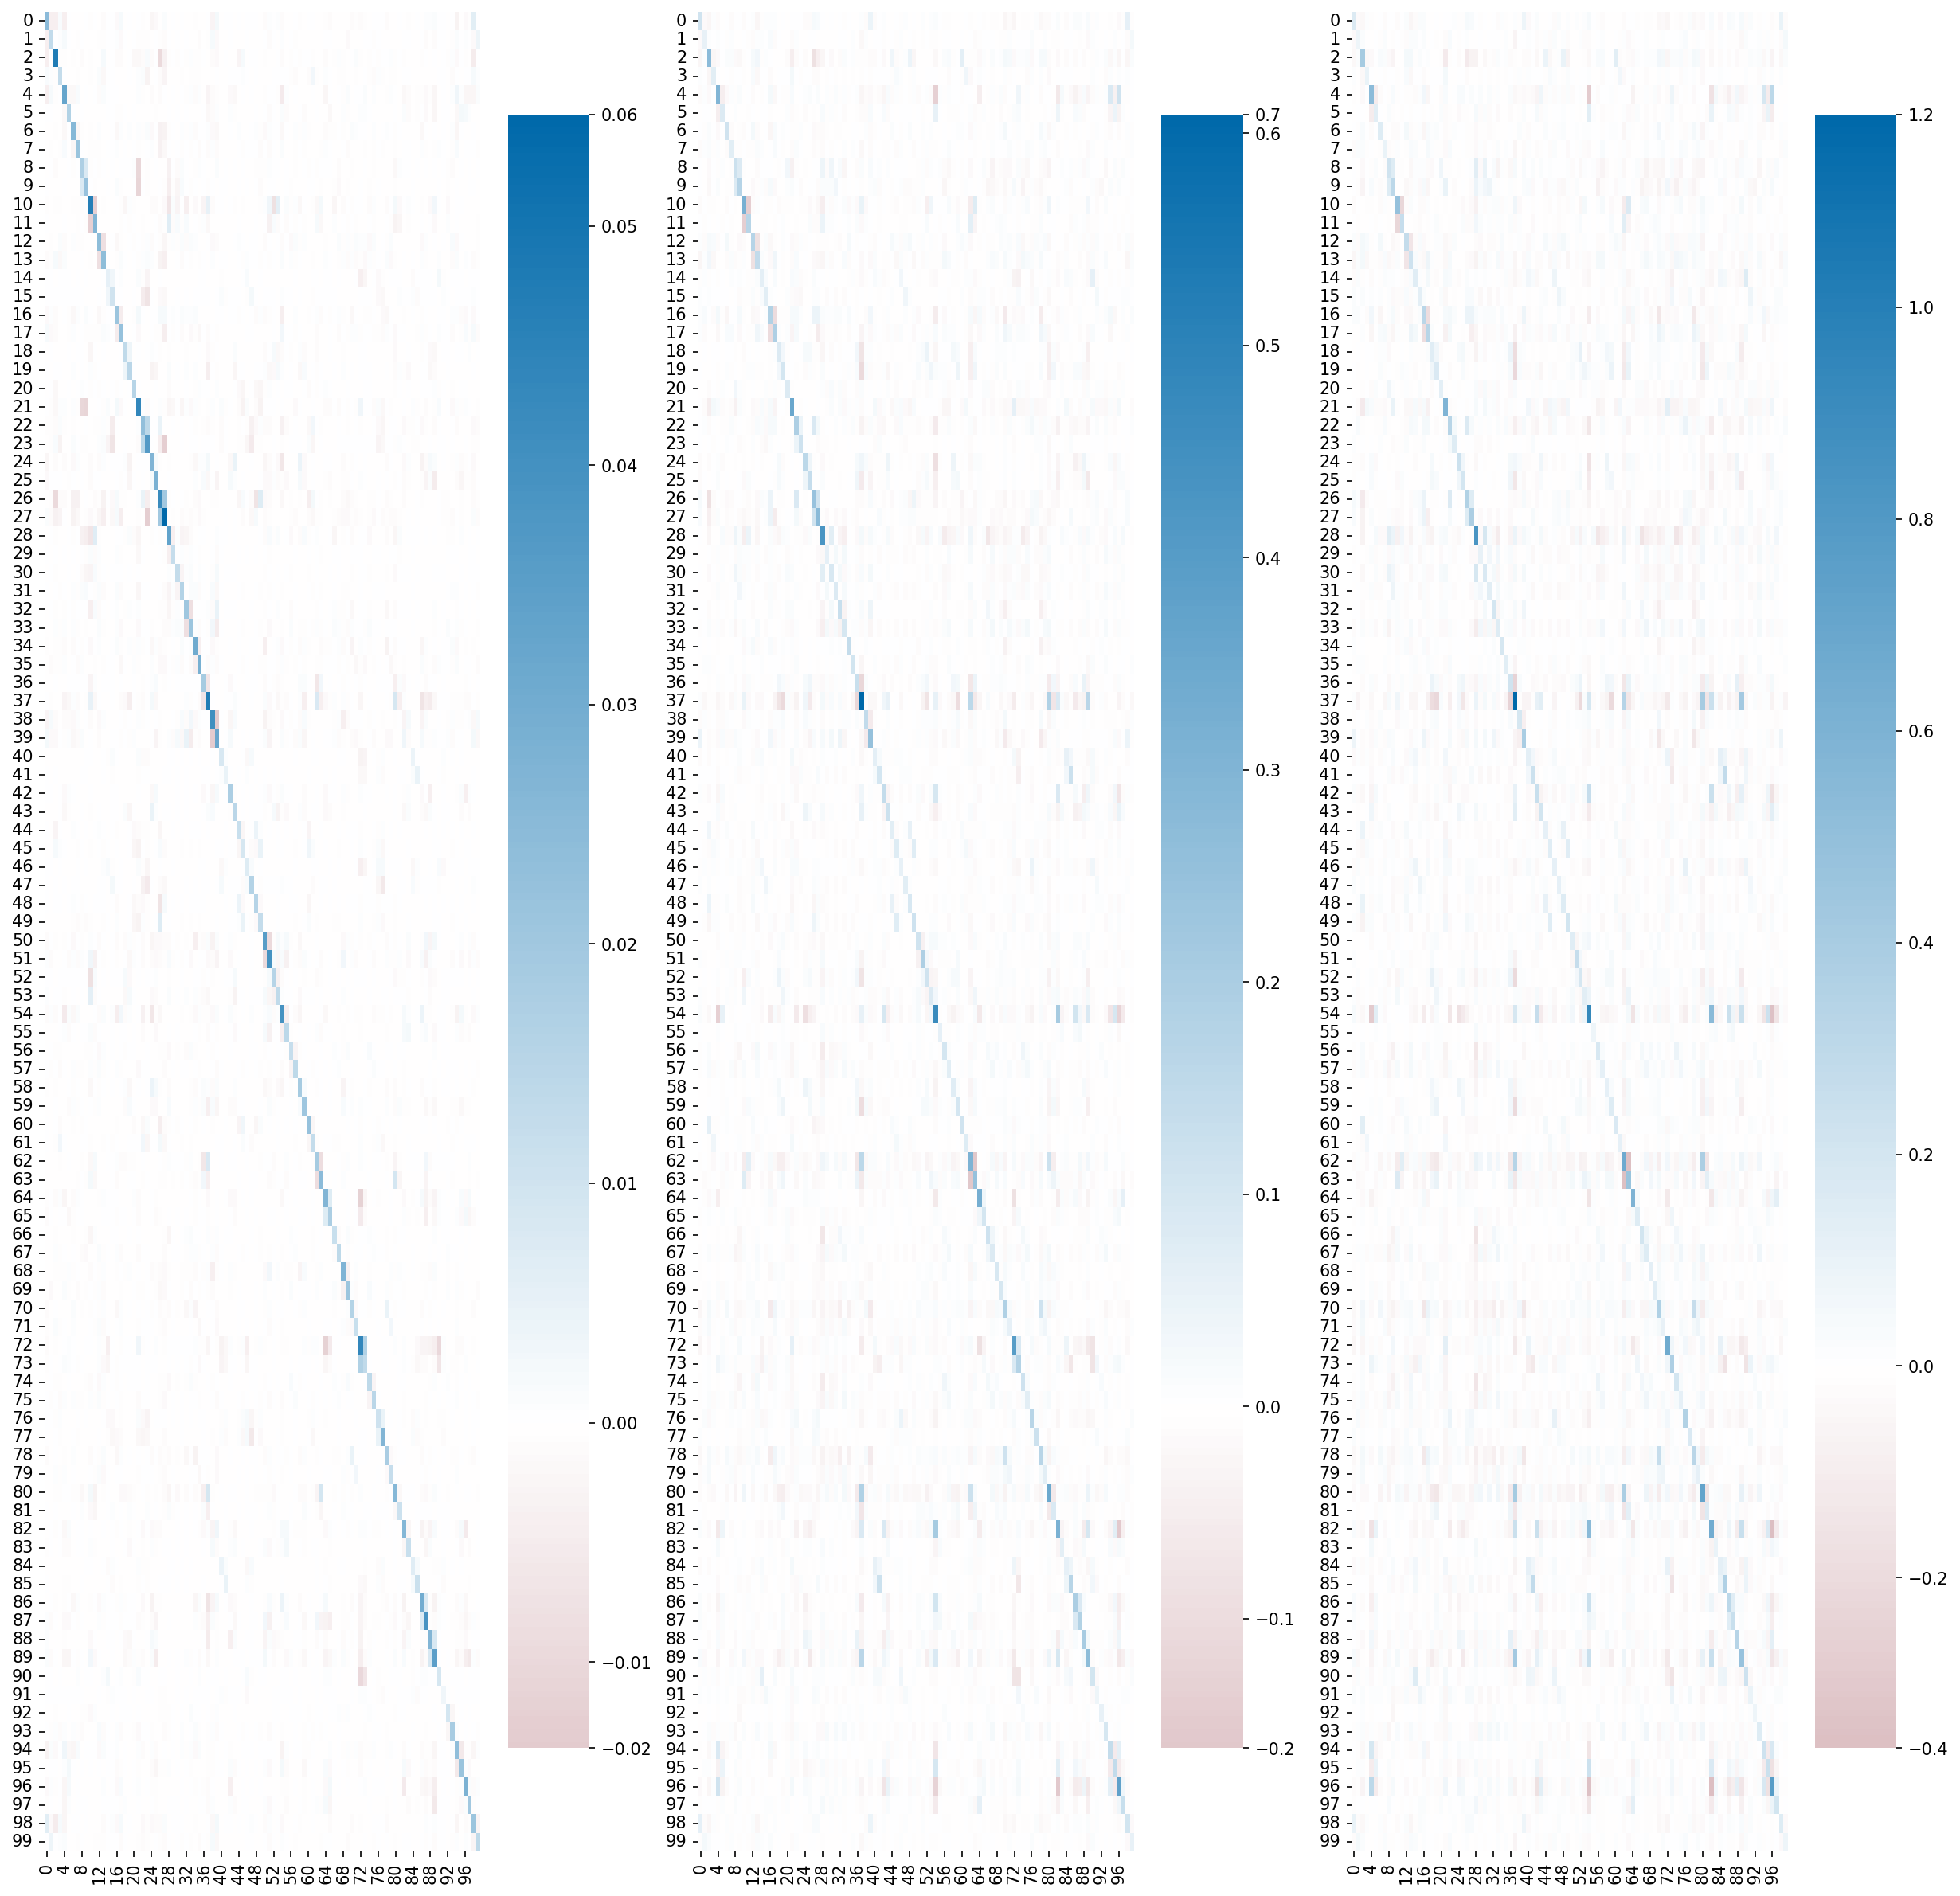

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
sns.heatmap(covs[0], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(covs[0]), vmax=np.max(covs[0]))), ax=ax1)
sns.heatmap(covs[1], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(covs[1]), vmax=np.max(covs[1]))), ax=ax2)
sns.heatmap(covs[2], cmap=cmap, norm=(MidpointNormalize(midpoint=0, vmin=np.min(covs[2]), vmax=np.max(covs[2]))), ax=ax3)

In [9]:
print(covs[1][37])

[ 5.10835741e-03 -2.24610809e-02 -5.38885128e-03 -5.89888310e-03
 -2.79074535e-02 -1.19545143e-02 -2.20502773e-03 -2.09341198e-02
  1.19991908e-02 -9.28857643e-03  4.96369675e-02 -1.80266071e-02
  3.23959580e-03 -1.56532731e-02 -1.69513896e-02  2.42564548e-03
 -1.03248062e-03 -2.88179778e-02 -7.66568109e-02 -1.06832013e-01
  1.20965531e-02 -1.02244001e-02 -3.54897715e-02  2.01799977e-03
  3.78996059e-02 -5.98085001e-02 -1.28659951e-02 -3.77311883e-03
  2.62335986e-02 -1.02141481e-02  1.45953270e-02 -8.14273674e-03
  1.64970588e-02 -1.12031540e-02 -4.96660534e-04 -2.47374196e-02
 -1.18063323e-01  6.08794391e-01 -5.18265972e-03 -2.05260571e-02
 -2.17385758e-02 -3.36112385e-03  3.69676054e-02  5.69769554e-02
 -1.17778894e-03  1.34672236e-03 -1.99495815e-02  2.58445879e-03
 -1.48295145e-03  9.07508365e-04 -2.01739371e-03 -3.46066654e-02
 -7.73436502e-02  2.15957663e-03  5.45977913e-02 -1.48874782e-02
  4.56289249e-03 -1.25646042e-02 -2.09394414e-02 -9.72930118e-02
 -2.73225270e-03 -3.86612

In [10]:
print(covs[2][37])

[ 1.82234459e-02 -5.61786592e-02 -1.74026135e-02 -1.31406076e-02
 -4.13695723e-02 -3.64775048e-03 -8.38086661e-03 -5.46528362e-02
  3.99179570e-02 -1.29918391e-02  7.29883015e-02 -2.43216977e-02
  6.09946810e-03 -4.83969636e-02 -5.40715232e-02  7.32099079e-03
  6.92097284e-03 -8.03324282e-02 -1.89494357e-01 -2.15455309e-01
  3.07417512e-02 -1.35040460e-02 -8.68331641e-02  2.29220348e-03
  5.76750562e-02 -1.34062633e-01 -3.09994016e-02 -8.92960094e-03
  8.63269269e-02 -2.52052229e-02  4.69514132e-02 -1.76314935e-02
  3.78933772e-02 -3.27065662e-02 -6.02074651e-05 -6.06673025e-02
 -2.42653862e-01  1.18173766e+00 -1.56806000e-02 -5.59897870e-02
 -6.39248639e-02 -1.04110017e-02  1.09179571e-01  1.35264650e-01
 -5.97183499e-03  9.21432674e-03 -6.14154041e-02  7.21451128e-03
 -5.55632357e-03  9.00447555e-03 -1.63493901e-02 -7.39395469e-02
 -2.04034165e-01  2.37925854e-02  1.85645476e-01 -2.03520264e-02
  2.41447310e-03 -3.89312468e-02 -6.57909214e-02 -2.03646854e-01
 -1.05124023e-02 -5.72932